In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [8]:
from utils import plot_wigner, plot_qfunc

### Constants

In [9]:
N = 3
r = 20 # k1/k2
k1 = 1

### Coherent States

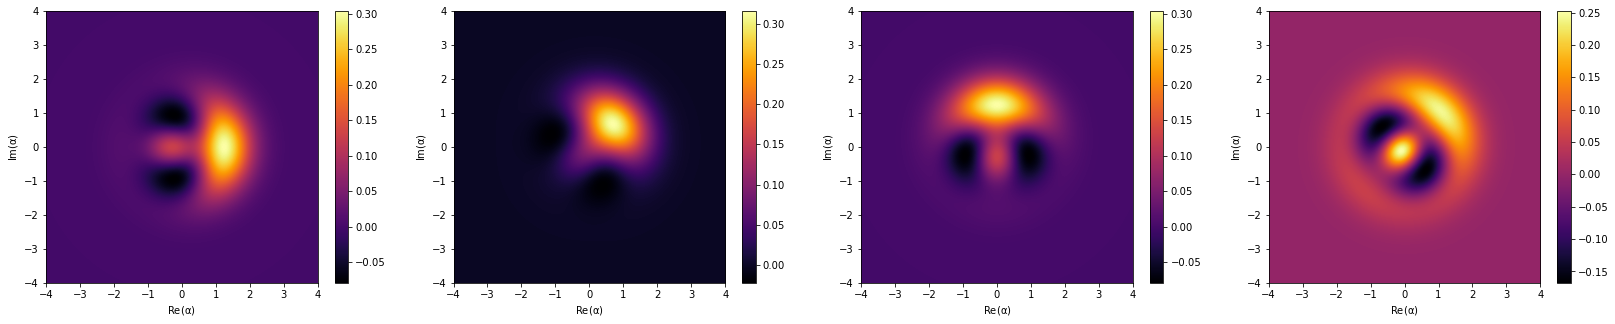

In [10]:
alphas = [1, 0.5+0.5j, 1j, 1+1j]
x = np.linspace(-4, 4, 1_000)
y = np.linspace(-4, 4, 1_000)

fig, axs = plt.subplots(1, len(alphas), figsize=[7*len(alphas), 5])
for alpha, ax in zip(alphas, axs):
    plot_wigner(coherent(N, alpha), x, y, ax=ax, cmap='inferno')

### QHO Operators

In [11]:
a = create(N)
adag = destroy(N)

### Operators for Dynamics
Natural units so set $\hbar = 1$

In [12]:
gain = k1 * lindblad_dissipator(adag)
loss = r/k1 * lindblad_dissipator(a**2)

## Steady State
For time-independent open quantum systems with decay rates larger than the corresponding excitation rates, the system will tend toward a steady state

### Interaction picture $\hat H=0$ with no signal

In [13]:
H0 = Qobj(np.zeros([N, N]))
sstate = steadystate(H0, [gain, loss])
sstate

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.01639344 0.         0.        ]
 [0.         0.6557377  0.        ]
 [0.         0.         0.32786885]]

(<AxesSubplot:xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>,
 <matplotlib.image.AxesImage at 0x228949a03d0>)

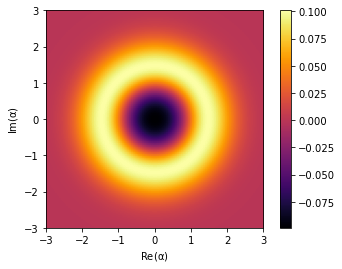

In [14]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
plot_wigner(sstate, x, y, cmap='inferno')

In [15]:
detuning = 0
drive_strength = k1
H_drive = detuning * adag*a + 0.5*drive_strength * (a + adag)

drive_sstate = steadystate(H_drive, [gain, loss])
drive_sstate

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.01529217+0.j         0.        -0.00703943j 0.00273606+0.j        ]
 [0.        +0.00703943j 0.60464721+0.j         0.        +0.10495912j]
 [0.00273606+0.j         0.        -0.10495912j 0.38006062+0.j        ]]

(<AxesSubplot:xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>,
 <matplotlib.image.AxesImage at 0x22894dda340>)

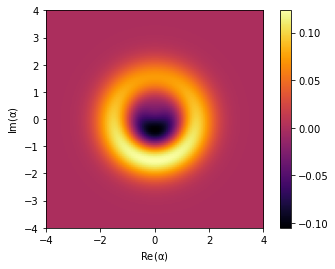

In [16]:
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
plot_wigner(drive_sstate, x, y, cmap='inferno')